In [712]:
import pandas as pd

In [713]:
df = pd.read_csv('kc_house_data.csv')

### Display data set

In [714]:
pd.set_option('display.max_columns',None) # display all columns
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


### id variable analysis

In [715]:
df['id'].value_counts() #Checking the number of occurence of each id so we can identify if this id can be considered the primary key for this data set

id
795000620     3
8651510380    2
2568300045    2
9353300600    2
4139480200    2
             ..
2767603649    1
1446403617    1
5602000275    1
1786200010    1
1523300157    1
Name: count, Length: 21436, dtype: int64

In [716]:
df[df['id']==795000620]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
17602,795000620,20140924T000000,115000.0,3,1.0,1080,6250,1.0,0,0,2,5,1080,0,1950,0,98168,47.5045,-122.33,1070,6250
17603,795000620,20141215T000000,124000.0,3,1.0,1080,6250,1.0,0,0,2,5,1080,0,1950,0,98168,47.5045,-122.33,1070,6250
17604,795000620,20150311T000000,157000.0,3,1.0,1080,6250,1.0,0,0,2,5,1080,0,1950,0,98168,47.5045,-122.33,1070,6250


### bedrooms vs house space analysis

The purpose of the below study is to proof by data that bedrooms is a categorical variable by trying to get the relationship between this variable and the house space.

In [717]:
df[['id','bedrooms','sqft_living','sqft_above','floors']].sort_values('bedrooms',ascending =False).head(15)

,id,bedrooms,sqft_living,sqft_above,floors
15870,2402100895,33,1620,1040,1.0
8757,1773100755,11,3000,2400,2.0
15161,5566100170,10,3610,3010,2.0
13314,627300145,10,4590,2500,1.0
19254,8812401450,10,2920,1860,2.0
8546,424049043,9,4050,4050,2.0
4096,1997200215,9,3830,2450,2.5
4235,2902200015,9,3680,2830,2.0
16844,8823900290,9,4620,3870,2.5
6079,9822700190,9,3650,2530,2.0


In [718]:
# the range of sqft_living and sqft_above of all houses
print('sqft_living range',[df['sqft_living'].min(),df['sqft_living'].max()])
print('sqft_above range',[df['sqft_above'].min(),df['sqft_above'].max()])

sqft_living range [290, 13540]
sqft_above range [290, 9410]


In [719]:
df_agg = df.groupby('bedrooms')[['sqft_living','sqft_above']].agg(['min','max']).reset_index()
df_agg

bedrooms sqft_living        sqft_above      
                    min    max        min   max
0         0         290   4810        290  4810
1         1         370   3000        370  3000
2         2         440   6840        440  4350
3         3         490   6400        490  5480
4         4         800   7850        580  7850
5         5        1120  10040        760  8020
6         6        1370  12050        900  8860
7         7        1940  13540       1400  9410
8         8        2280   7710       1210  6090
9         9        2820   4620       1880  4050
10       10        2920   4590       1860  3010
11       11        3000   3000       2400  2400
12       33        1620   1620       1040  1040

<Axes: title={'center': 'Relationship between sqft above and bedrooms'}, xlabel='bedrooms'>

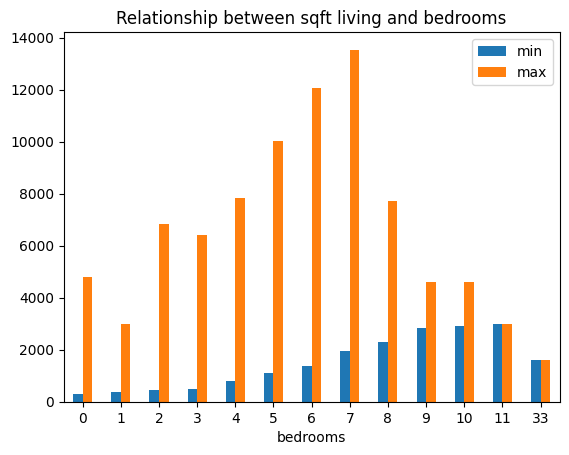

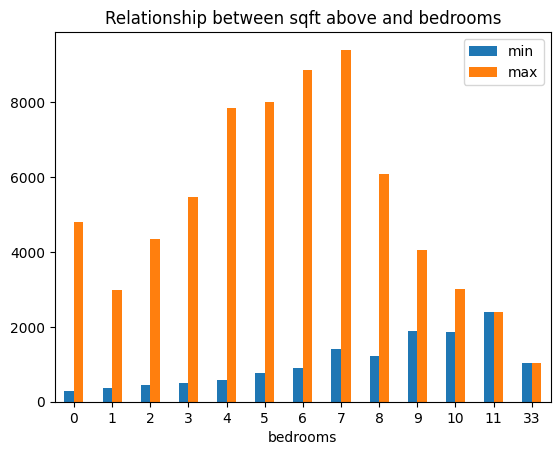

In [720]:
df_agg.plot.bar(x='bedrooms', y='sqft_living', rot=0,title="Relationship between sqft living and bedrooms")
df_agg.plot.bar(x='bedrooms', y='sqft_above', rot=0,title="Relationship between sqft above and bedrooms")


In [721]:
from math import radians, cos, sin, asin, sqrt
def get_distance(lat1,lon1,lat2,lon2):
    lon1 = radians(lon1)
    lon2 = radians(lon2)
    lat1 = radians(lat1)
    lat2 = radians(lat2)
    a = sin((lat2 - lat1) / 2)**2 + cos(lat1) * cos(lat2) * sin((lon2 - lon1) / 2)**2
    c = 2 * asin(sqrt(a))
    return (c * 6371)

### House prices vs demography

In [722]:
df_price_intervals = pd.cut(df['price'],bins=20)
df_price_intervals.value_counts()

price
(67375.0, 456250.0]       11041
(456250.0, 837500.0]       7981
(837500.0, 1218750.0]      1632
(1218750.0, 1600000.0]      533
(1600000.0, 1981250.0]      215
(1981250.0, 2362500.0]       83
(2362500.0, 2743750.0]       57
(2743750.0, 3125000.0]       33
(3125000.0, 3506250.0]       16
(3506250.0, 3887500.0]       10
(5031250.0, 5412500.0]        3
(3887500.0, 4268750.0]        2
(4268750.0, 4650000.0]        2
(4650000.0, 5031250.0]        1
(5412500.0, 5793750.0]        1
(6556250.0, 6937500.0]        1
(6937500.0, 7318750.0]        1
(7318750.0, 7700000.0]        1
(5793750.0, 6175000.0]        0
(6175000.0, 6556250.0]        0
Name: count, dtype: int64

In [723]:
df_price_intervals = pd.cut(df.loc[df['price']<=2000000]['price'],bins=20)
df_price_intervals.value_counts()

price
(267500.0, 363750.0]      4214
(363750.0, 460000.0]      3915
(460000.0, 556250.0]      2997
(171250.0, 267500.0]      2690
(556250.0, 652500.0]      2233
(652500.0, 748750.0]      1490
(748750.0, 845000.0]      1175
(845000.0, 941250.0]       724
(941250.0, 1037500.0]      402
(73075.0, 171250.0]        380
(1037500.0, 1133750.0]     254
(1133750.0, 1230000.0]     219
(1230000.0, 1326250.0]     172
(1326250.0, 1422500.0]     144
(1422500.0, 1518750.0]      94
(1518750.0, 1615000.0]      90
(1615000.0, 1711250.0]      80
(1711250.0, 1807500.0]      50
(1807500.0, 1903750.0]      50
(1903750.0, 2000000.0]      42
Name: count, dtype: int64

In [724]:
[df['lat'].min(),df['lat'].max()]
min(df['lat'])

47.1559

In [725]:
df_agg_price = df.groupby(df_price_intervals)[['lat','long']].agg(['min','max'])
df_agg_price

lat              long         
                            min      max      min      max
price                                                     
(73075.0, 171250.0]     47.2021  47.7654 -122.445 -121.315
(171250.0, 267500.0]    47.1764  47.7775 -122.509 -121.319
(267500.0, 363750.0]    47.1647  47.7775 -122.512 -121.403
(363750.0, 460000.0]    47.1559  47.7776 -122.511 -121.321
(460000.0, 556250.0]    47.1879  47.7776 -122.505 -121.417
(556250.0, 652500.0]    47.2411  47.7767 -122.519 -121.707
(652500.0, 748750.0]    47.1593  47.7759 -122.475 -121.691
(748750.0, 845000.0]    47.1622  47.7760 -122.464 -121.713
(845000.0, 941250.0]    47.2332  47.7745 -122.455 -121.744
(941250.0, 1037500.0]   47.3389  47.7764 -122.514 -121.766
(1037500.0, 1133750.0]  47.4125  47.7602 -122.413 -121.731
(1133750.0, 1230000.0]  47.3344  47.7735 -122.412 -121.856
(1230000.0, 1326250.0]  47.3293  47.7729 -122.412 -121.973
(1326250.0, 1422500.0]  47.3907  47.7633 -122.451 -121.922
(1422500.0, 1518750.0]  47.4302  47.7183 -122.411 -121.779
(1518750.0, 1615000.0]  47.4414  47.7666 -122.412 -121.878
(1615000.0, 1711250.0]  47.4418  47.7561 -122.411 -121.896
(1711250.0, 1807500.0]  47.5016  47.7624 -122.403 -121.905
(1807500.0, 1903750.0]  47.4485  47.7404 -122.416 -121.905
(1903750.0, 2000000.0]  47.4548  47.7615 -122.409 -121.756

In [726]:

df_agg_price[('lat-diff (km)')] = df_agg_price[[('lat', 'min'), ('lat', 'max')]].apply(lambda row: get_distance(row[('lat','min')],0,row[('lat','max')],0),axis=1)

df_agg_price[('long-diff (km)')] = df_agg_price[[('long', 'min'), ('long', 'max')]].apply(lambda row: get_distance(0,row[('long','min')],0,row[('long','max')]),axis=1)

df_agg_price


lat              long          lat-diff (km)  \
                            min      max      min      max                 
price                                                                      
(73075.0, 171250.0]     47.2021  47.7654 -122.445 -121.315     62.636102   
(171250.0, 267500.0]    47.1764  47.7775 -122.509 -121.319     66.839270   
(267500.0, 363750.0]    47.1647  47.7775 -122.512 -121.403     68.140251   
(363750.0, 460000.0]    47.1559  47.7776 -122.511 -121.321     69.129886   
(460000.0, 556250.0]    47.1879  47.7776 -122.505 -121.417     65.571648   
(556250.0, 652500.0]    47.2411  47.7767 -122.519 -121.707     59.556003   
(652500.0, 748750.0]    47.1593  47.7759 -122.475 -121.691     68.562792   
(748750.0, 845000.0]    47.1622  47.7760 -122.464 -121.713     68.251446   
(845000.0, 941250.0]    47.2332  47.7745 -122.455 -121.744     60.189814   
(941250.0, 1037500.0]   47.3389  47.7764 -122.514 -121.766     48.647780   
(1037500.0, 1133750.0]  47.4125  47.7602 -122.413 -121.731     38.662476   
(1133750.0, 1230000.0]  47.3344  47.7735 -122.412 -121.856     48.825692   
(1230000.0, 1326250.0]  47.3293  47.7729 -122.412 -121.973     49.326069   
(1326250.0, 1422500.0]  47.3907  47.7633 -122.451 -121.922     41.431230   
(1422500.0, 1518750.0]  47.4302  47.7183 -122.411 -121.779     32.035258   
(1518750.0, 1615000.0]  47.4414  47.7666 -122.412 -121.878     36.160590   
(1615000.0, 1711250.0]  47.4418  47.7561 -122.411 -121.896     34.948565   
(1711250.0, 1807500.0]  47.5016  47.7624 -122.403 -121.905     28.999637   
(1807500.0, 1903750.0]  47.4485  47.7404 -122.416 -121.905     32.457799   
(1903750.0, 2000000.0]  47.4548  47.7615 -122.409 -121.756     34.103484   

                       long-diff (km)  
                                       
price                                  
(73075.0, 171250.0]        125.650267  
(171250.0, 267500.0]       132.321963  
(267500.0, 363750.0]       123.315174  
(363750.0, 460000.0]       132.321963  
(460000.0, 556250.0]       120.980080  
(556250.0, 652500.0]        90.290280  
(652500.0, 748750.0]        87.176822  
(748750.0, 845000.0]        83.507390  
(845000.0, 941250.0]        79.059593  
(941250.0, 1037500.0]       83.173805  
(1037500.0, 1133750.0]      75.834940  
(1133750.0, 1230000.0]      61.824379  
(1230000.0, 1326250.0]      48.814573  
(1326250.0, 1422500.0]      58.822116  
(1422500.0, 1518750.0]      70.275194  
(1518750.0, 1615000.0]      59.378091  
(1615000.0, 1711250.0]      57.265387  
(1711250.0, 1807500.0]      55.375073  
(1807500.0, 1903750.0]      56.820608  
(1903750.0, 2000000.0]      72.610287

### Waterfront and View vs Price and Space

In [737]:
# df_agg = df[['waterfront', 'view','sqft_living','sqft_lot','price']].groupby(['waterfront','view']).agg({'sqft_living':'mean','sqft_lot':'mean','price':'mean'},'count').round(1)
# df_agg

df_agg = df[['waterfront', 'view', 'sqft_living', 'sqft_lot', 'price']].groupby(['waterfront', 'view']).agg(
    sqft_living_avg=('sqft_living', 'mean'),
    sqft_lot_avg=('sqft_lot', 'mean'),
    price_avg=('price', 'mean'),
    number_of_house=('price', 'count')).round(1)


df_agg


sqft_living_avg  sqft_lot_avg  price_avg  number_of_house
waterfront view                                                           
0          0              1997.8       14179.2   496623.5            19489
           1              2570.9       11891.3   813054.9              331
           2              2649.3       22158.1   783955.1              955
           3              3039.2       34123.4   964685.1              491
           4              3412.6       22720.3  1270713.3              184
1          1              1940.0      167125.0   635000.0                1
           2              3369.1       34060.0  1842187.5                8
           3              2485.3       51986.0  1173605.3               19
           4              3268.1       20061.3  1728299.6              135